# Laplacian algorithm for motion blur detection

In [21]:
from laplacian_blur_detection import MotionBlurDetectionLaplacian
from data_preparation import get_regions_with_labels
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from visualisations import mask_on_image, confusion_matrix
import cv2

ImportError: cannot import name 'get_img_regions' from 'data_preparation' (/Users/juliazur/Documents/AGH/9semestr/WK/projekt/MotionBlurDetection/data_preparation.py)

In [ ]:
thresholds = range(100,2001,100)
predictions = {}
for threshold in thresholds:
    laplacian = MotionBlurDetectionLaplacian(threshold=threshold)
    prediction = laplacian.predict()
    predictions[threshold] = prediction

In [4]:
images_regions = get_regions_with_labels()

In [5]:
ground_truth_labels = [image_region.label for image_region in images_regions]

### Accuracy score for each threshold

In [13]:
accuracies = []
for threshold, prediction in predictions.items():
    predicted_labels = [pred for pred, fm in prediction]
    accuracy = accuracy_score(ground_truth_labels, predicted_labels)
    accuracies.append(accuracy)

The best accuracy is for threshold 1700.

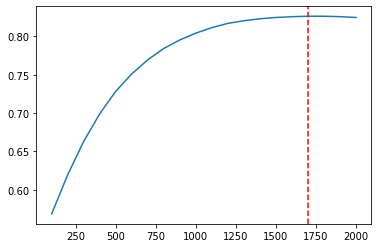

In [15]:
index_max_element = accuracies.index(max(accuracies))
plt.plot(thresholds, accuracies)
plt.axvline(x=thresholds[index_max_element], c = 'r', ls="--")
plt.show()

### Result visualisations

Sample image blur detection result for best threshold

In [20]:
image_path = './results/blurred.jpg'
laplacian = MotionBlurDetectionLaplacian(threshold=1700.)
image_predictions = laplacian.predict_single_image(image_path)
image_mask = mask_on_image(image_path, image_predictions)
cv2.imshow(image_mask)

AttributeError: 'MotionBlurDetectionLaplacian' object has no attribute 'predict_single_image'

In [22]:
predicted_labels = [pred for pred, fm in predictions.values()]
confusion_matrix(ground_truth_labels, predicted_labels)


ValueError: too many values to unpack (expected 2)